# Sok-1006 Mikro
## Seminar 7
### Oppgave 3

Vi skal gjenbruke mye av koden fra Seminar 7 oppgave 1 her!

### deloppgave a)

In [116]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [117]:
# Sett opp Lagrange for nyttemaksimering
sp.symbols("\lambda", real=True, positive=True)
x, y, a, m, p, lmda =sp.symbols("x y a m p \lambda", real=True, positive=True)
U=x**a*y**(1-a)
L=U-lmda*(p*x+y-m)
L

-\lambda*(-m + p*x + y) + x**a*y**(1 - a)

In [118]:
# Førsteordensbetingelser
dL_x=sp.diff(L,x)
dL_y=sp.diff(L,y)
display(dL_x)
display(dL_y)

-\lambda*p + a*x**a*y**(1 - a)/x

-\lambda + x**a*y**(1 - a)*(1 - a)/y

In [119]:
display(dL_x.args)
display(dL_y.args)

(-\lambda*p, a*x**a*y**(1 - a)/x)

(-\lambda, x**a*y**(1 - a)*(1 - a)/y)

In [120]:
display(dL_x.args[0]/dL_y.args[0])
display(sp.simplify(dL_x.args[1]/dL_y.args[1]))
# ta sp. simplify på siste uttrykk for å få på enklest mulig form

p

-a*y/(x*(a - 1))

Da har vi $p=\frac{ay}{(1-a)x}$ som gir oss det relative forholdet mellom etterspurt mengde $x$ og $y$ som $y=\frac{(1-a)px}{a}$.

For å fullføre løsningen bruker vi denne informasjonen i budsjettbetingelsen.

In [121]:
x_sol=sp.solve(sp.Eq((p*x+y).subs(y,(1-a)*p*x/(a)),m),x)[0]
y_sol=sp.solve(sp.Eq((p*x+y).subs(x,a*y/((1-a)*p)),m),y)[0]
display(x_sol)
display(y_sol)

a*m/p

m*(1 - a)

Dette er Sylvi sin etterspørsel etter gode x og gode y.  

### deloppgave b)

Budsjettbetingelsen med en avgift på gode x blir $p(1+t)x+y=m$. Den realtive tilpasningen er nå $y=\frac{(1-a)p(1+t)x}{a}$.

In [122]:
t=sp.symbols("t", real=True, positive=True)
x_sol_t=sp.solve(sp.Eq((p*(1+t)*x+y).subs(y,(1-a)*p*(1+t)*x/(a)),m),x)[0]
y_sol_t=sp.solve(sp.Eq((p*(1+t)*x+y).subs(x,a*y/((1-a)*p*(1+t))),m),y)[0]
display(x_sol_t)
display(y_sol_t)

a*m/(p*(t + 1))

m*(1 - a)

Det er kun tilpasningen til gode x som påvirkes. Med Cobb-Douglas nytte får vi ingen krysspriseffekt i etterspørsel (det har vi sett før).

For å tegne indifferenskurver må vi løse $u_0=U$ for $y$, hvor $u_0$ er et vilkårlig valgt nyttenivå.

In [123]:
u_0=sp.symbols('u_0')
y_ind_sol=sp.solve(U-u_0,y)[0]
y_ind_sol

x**(a/(a - 1))/u_0**(1/(a - 1))

In [124]:
# lag en funksjon som kan plottes
indiff_y=sp.lambdify( (u_0,a,x), y_ind_sol)
indiff_y(u_0,a,x)

x**(a/(a - 1))/u_0**(1/(a - 1))

In [125]:
nytte_nivå=sp.lambdify((a,p,m), x_sol**a*y_sol**(1-a))
nytte_nivå(a,p,m)

(m*(1 - a))**(1 - a)*(a*m/p)**a

In [126]:
# sett verdiene som brukes i del d: p=0.2,a=.5,m=1
nytte_nivå(.5,.2,1)

1.118033988749895

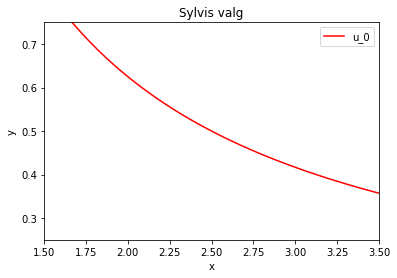

In [127]:
x_num=np.linspace(0.01,5,100)

# eksempel med p=0.2,a=.5,m=1

fig,ax=plt.subplots()
 
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.plot(x_num, indiff_y(nytte_nivå(.5,.2,1), 0.5,x_num),label='u_0', color='red')


             
    
ax.set_ylim([0.25, 0.75])
ax.set_xlim([1.5, 3.5])


ax.legend(loc='upper right')
ax.set_title('Sylvis valg')


plt.show()

Vi tegner inn Stans budsjett.

In [128]:
# budsjett med avgift
def y_bud(m, p,x,t):
    return (m-p*(1+t)*x)
y_bud(m, p,x,t)

m - p*x*(t + 1)

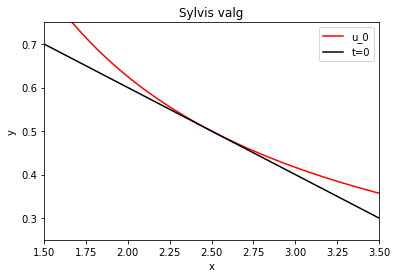

In [129]:
# sett p=0.2,a=.5,m=1, t=0 (uten avgift)
ax.plot(x_num, y_bud(1, .2,x_num, 0), label='t=0', color='black')
ax.legend(loc='upper right')
fig

Optimal tilpasning for avgiften i tangeringspunktet mellom indifferenskurve $u_0$ og budsjettlinjen. La oss regne dette ut:

In [130]:
opt_x=sp.lambdify( (a,m,p,t), x_sol_t)
opt_y=sp.lambdify( (a,m,p,t), y_sol_t)
display(opt_x(a,m,p,t))
display(opt_y(a,m,p,t))

a*m/(p*(t + 1))

m*(1 - a)

In [131]:
display(opt_x(.5,1,.2,0))
display(opt_y(.5,1,.2,0))

2.5

0.5

Før avgiften har vi x=2.5, y=.5.     

La oss tegne innbudsjettbetingelsen med avgift på t=0.1.

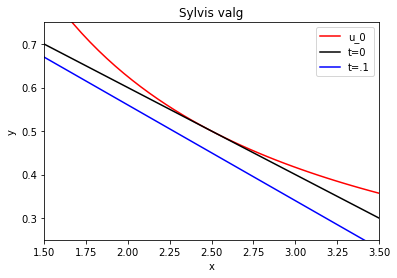

In [132]:
ax.plot(x_num, y_bud(1, .2,x_num, 0.1), label='t=.1', color='blue')
ax.legend(loc='upper right')
fig

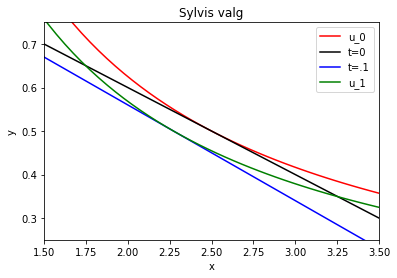

In [133]:
# plotte inn indifferenskurven (erstatt p med 0.2(1.1))
ax.plot(x_num, indiff_y(nytte_nivå(.5,.2*(1.1),1), 0.5,x_num),label='u_1', color='green')
ax.legend(loc='upper right')
fig

In [134]:
display(opt_x(.5,1,.2,.1))
display(opt_y(.5,1,.2,1))

2.2727272727272725

0.5

Etterspørsel etter y er det samme som før avgiften, mens etterspørsel etter x faller fra 2.5 til 2.273.

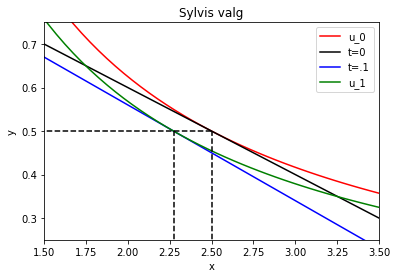

In [135]:
ax.hlines(0.5,0,2.5, ls='dashed', color='black')
ax.vlines(2.5,0,0.5,ls='dashed', color='black')
ax.vlines(opt_x(.5,1,.2,.1),0,0.5,ls='dashed', color='black')
fig

### deloppgave c)      
La oss rydde litt i figuren for å vise substitusjons- og inntektseffekt.

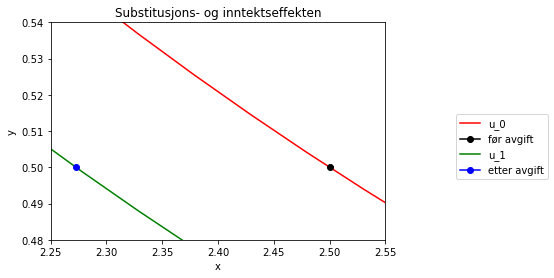

In [155]:
fig,ax1=plt.subplots()
 
ax1.set_ylabel('y')
ax1.set_xlabel('x')

ax1.plot(x_num, indiff_y(nytte_nivå(.5,.2,1), 0.5,x_num),label='u_0', color='red')
ax1.plot(2.5,0.5,marker='o', color='black', label='før avgift')

ax1.plot(x_num, indiff_y(nytte_nivå(.5,.2*(1.1),1), 0.5,x_num),label='u_1', color='green')
ax1.plot(opt_x(.5,1,.2,.1),0.5,marker='o', color='blue', label='etter avgift')


             
    
ax1.set_ylim([0.48, 0.54])
ax1.set_xlim([2.25, 2.55])


ax1.legend(bbox_to_anchor=(1.5,0.6))
ax1.set_title('Substitusjons- og inntektseffekten')


plt.show()

Her er tilpasningspunktene tegnet inn. Vi må finne hvor mye inntekt Sylvi må få etter at avgiften er innført for å oppnå det opprinelige nyttenivået $u_0$. Vi har kalt dette `nytte_nivå(.5,.2,1)`.

In [137]:
m_komp=sp.solve(opt_x(.5,m,.2,.1)**.5*opt_y(.5,m,.2,.1)**.5-nytte_nivå(.5,.2,1),m)[0]
m_komp

1.04880884817015

Da må Sylvi få en inntekt på 1.049 for å kompensere for avgiften. Tegn inn budsjettlinjen med avgift på t=0.1 og denne inntekten.

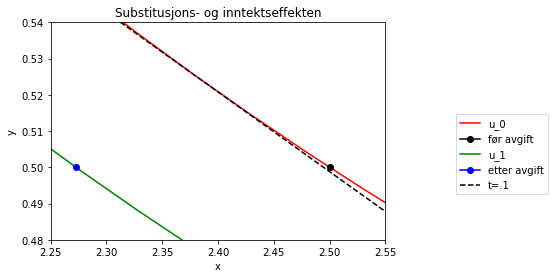

In [156]:
ax1.plot(x_num, y_bud(m_komp, .2,x_num, 0.1), label='t=.1', ls='dashed',
         color='black')
ax1.legend(bbox_to_anchor=(1.5,0.6))
fig

In [139]:
# finn tilpasningspunkt
display(opt_x(.5,m_komp,.2,.1))
display(opt_y(.5,m_komp,.2,.1))


2.38365647311398

0.524404424085075

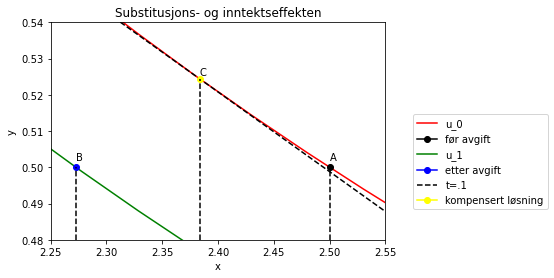

In [157]:
ax1.plot(opt_x(.5,m_komp,.2,.1),opt_y(.5,m_komp,.2,.1),marker='o', 
         color='yellow', label='kompensert løsning')
ax1.vlines(2.5,0.48,0.5,ls='dashed', color='black')
ax1.vlines(opt_x(.5,1,.2,.1),0.48,0.5,ls='dashed', color='black')
ax1.vlines(float(opt_x(.5,m_komp,.2,.1)),0.48,float(opt_y(.5,m_komp,.2,.1)), ls='dashed', color='black')
ax1.annotate("A", (2.5,.502))
ax1.annotate("B", (opt_x(.5,1,.2,.1),.502))
ax1.annotate("C", (float(opt_x(.5,m_komp,.2,.1)),float(opt_y(.5,m_komp,.2,.1))+.001))

ax1.legend(bbox_to_anchor=(1.5,0.6))

fig

Tilpasningen før avgiften er i A. Tilpasningen etter avgiften er i B. Punkt C er en tenkt tilpasning som oppstår dersom Sylvi kompenseres for avgftsøkningen ved å få en økning i inntekt for å oppnå opprinnelig nyttenivå $u_0$     

Totaleffekten er fra A til B.    

Av dette er A til C pga prisendringen forårsaket av avgiften - dette er substitusjonseffekten.     

C til B måler effekten på konsum som følge av at avgiften gir Sylvi mindre penger å bruke på konsum - inntektseffekten.

### deloppgave d)       

Vi har gjort alle beregninger da vi tegnet figuren ovenfor, men det er greit å gjenta stegene og passe på at du vet hva som er hva i figuren!

In [141]:
# steg 1
opt_x(.5,1,.2,0)-opt_x(.5,1,.2,.1)

0.22727272727272751

In [142]:
# steg 2
nytte_nivå(.5,.2,1)

1.118033988749895

In [143]:
# steg 3
m_komp

1.04880884817015

In [144]:
# steg 4
opt_x(.5,m_komp,.2,.1)

2.38365647311398

In [145]:
# steg 5 Inntektseffekten
opt_x(.5,m_komp,.2,.1)-opt_x(.5,1,.2,0)

-0.116343526886025

In [146]:
# steg 6 Substitusjonseffekten
opt_x(.5,1,.2,.1)-opt_x(.5,m_komp,.2,.1)

-0.110929200386703

### deloppgave e)     

Skatteproveny er 10% av beløpet som Sylvi bruker på gode x, dvs (0.1)(0.2)`opt_x(.5,1,.2,.1)`.

In [147]:
skatt_t=.1*.2*opt_x(.5,1,.2,.1)
skatt_t

0.045454545454545456

### deloppgave f)    

Vi oppdaget at Sylvi betalte 0.0455 i skatt. Dersom hum skal betale sammen beløp med en inntektsskatt gitt inntekt m=1, må skattesatsen være på T=0.0455, dvs 4,55%.

### deloppgave g)     

Inntekten etter skatt blir da 0.9545. La oss sjekke at hun har råd med denne inntekten til å kjøpe mengdene fra (b) dersom prisen er p=0.2.

In [148]:
np.round(0.2*opt_x(.5,1,.2,.1)+opt_y(.5,1,.2,.1),4)

0.9545

Da kan Sylvi kjøpe godekombinasjon som er mulig med en 10% avgift på gode x!  Dette er ikke overraskende ettersom fordeling av inntekt med an avgift på gode x er $px+tx+y=1$ og med en inntektsskatt $px+y=1-T$. Ettersom vi har sagt at skatten hun betaler er det samme uansett system har vi $T=tx$ så hun kan kjøpe damme godekombinasjon uansett om skatten legges på konsum av x eller inntekt.

### deloppgave h)    

La oss tegne på nytt tilpasningen som vi får med en avgifgt på gode x.

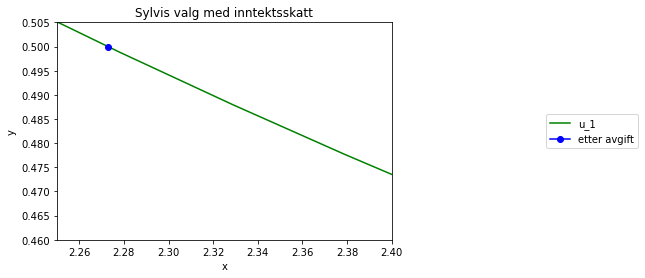

In [158]:
fig,ax2=plt.subplots()
 
ax2.set_ylabel('y')
ax2.set_xlabel('x')

ax2.plot(x_num, indiff_y(nytte_nivå(.5,.2*(1.1),1), 0.5,x_num),label='u_1', color='green')
ax2.plot(opt_x(.5,1,.2,.1),0.5,marker='o', color='blue', label='etter avgift')


             
    
ax2.set_ylim([0.46, 0.505])
ax2.set_xlim([2.25,2.4])


ax2.legend(bbox_to_anchor=(1.75,0.6))
ax2.set_title('Sylvis valg med inntektsskatt')


plt.show()

Så kan vi tegne inn budsjettlinjen fratrukket inntektsskatten: `y_bud(0.9545, .2,x_num, 0)` hvor m=0.9545, p=.2, t=0.

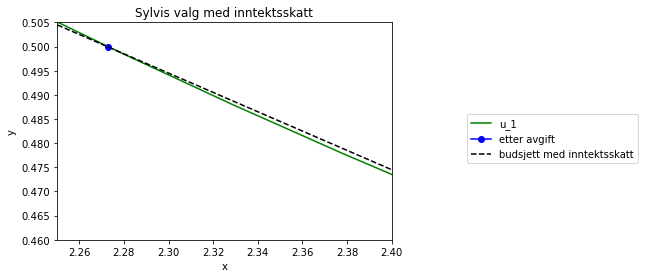

In [159]:
ax2.plot(x_num, y_bud(0.9545, .2,x_num, 0), label='budsjett med inntektsskatt', ls='dashed',
         color='black')
ax2.legend(bbox_to_anchor=(1.75,0.6))
fig

Som vi vet er det mulig å kjøpe tilpasningen med en avgift på gode x ettersom den nye budsjettlinjen går gjennom det punktet. Men legg merke til at det er noen mulige kombinasjoner på x og y som gir større nytte enn dette punktet (sør-øst for den blå prikken).     

Vi kan tegne inn det optimale valget:

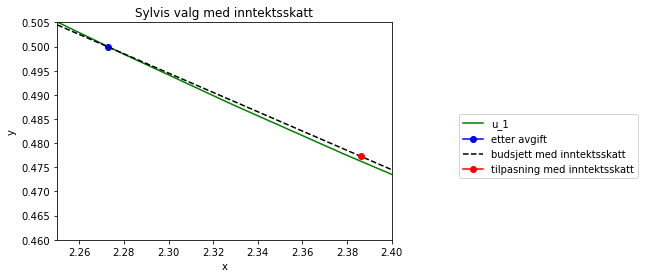

In [160]:
ax2.plot(opt_x(.5,0.9545,.2,0),opt_y(.5,0.9545,.2,0),marker='o', 
         color='red', label='tilpasning med inntektsskatt')
ax2.legend(bbox_to_anchor=(1.75,0.6))
fig

Tilpasningen med inntektsskatt må ligge på en høyere indifferenskurve enn tilpasningen med en avgift (forstår du hvorfor?). Da får Sylvi det bedre med en inntektsskatt enn med en skatt på ett av godene.

### deloppgave i)     

Sylvi tenker feil her. En skatt på inntekt reduserer Sylvi sine konsummuligheter, men priser er uendret. Dette gir en inntektseffekt, men ingen substitusjonseffekt. En skatt på gode x endrer den relative prisen på godene og gir to effekter: en substitusjonseffekt som gjør at hun kjøper mindre av godet som er blitt relativt dyrere, og en inntektseffekt fordi hun kan kjøpe mindre med inntekten enn før. 